<a href="https://colab.research.google.com/github/kzw333/GEO5990-final/blob/main/geog5990m_final_project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5990M Final Assignment (Template)

Student ID number:

In [ ]:
# read in required packages
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import any further required packages
# Install the contextily library (for adding map basemaps like OpenStreetMap)
# Install the geoplot library (for advanced geographical data visualizations, like choropleth maps, density plots, etc.)
# Install the geo_northarrow library from GitHub (for adding a north arrow to maps
!pip install contextily
!pip install geoplot
!pip install git+https://github.com/pmdscully/geo_northarrow.git
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import contextily as ctx
import seaborn as sns

import geoplot as gplt
import geoplot.crs as gcrs
from geo_northarrow import add_north_arrow
import matplotlib.patches as patches

This is an example block of mardown text I want to reference <a href="#ref1">[1]</a>. I might need to add some more citations <a href="#ref2">[2]</a><a href="#ref2">[3]</a>



In [175]:
1.#load data
voa_property_age_data = pd.read_csv('https://github.com/kzw333/GEO5990-final/raw/refs/heads/main/voapropertyage.csv')
price_data = pd.read_csv('https://github.com/kzw333/GEO5990-final/raw/refs/heads/main/Median_Prices_Quarterly.csv')
price_data_2020=pd.read_csv('https://github.com/kzw333/GEO5990-final/raw/refs/heads/main/hpssa202103.csv')
leeds=gpd.read_file('https://github.com/kzw333/GEO5990-final/raw/refs/heads/main/Leeds.geojson')
2.#Data Exploration
#View the data structure
#voa_property_age_data.head()
#price_data.head()
#voa_property_age_data.info()
# Check for missing values
#voa_property_age_data.isnull().sum()
#price_data.isnull().sum()
#print(price_data['lsoa_cd'].isnull().sum())
# let's have a look at the Leeds geopandas dataframe
#leeds.head()
#leeds.info()
#leeds.isnull().sum()
# Check the CRS
#print(leeds.crs)

#Use the explore() method from geopandas to create an interactive map, quickly visualizing the spatial data in the leeds GeoDataFrame
#leeds.explore()
#3.Data Cleaning
# 删除 'lsoa_cd' 列中包含缺失值的行
price_data = price_data.dropna(subset=['lsoa_cd'])
# 显示删除后的结果
#print(price_data)
#print(price_data['lsoa_cd'].isnull().sum())
#使用中位数填充
price_data.iloc[:, 2:] = price_data.iloc[:, 2:].apply(lambda row: row.fillna(row.median()), axis=0)
#print(price_data)
#price_data.isnull().sum()
#4.merge
df = pd.merge(voa_property_age_data, price_data, left_on='AREA_CODE', right_on='lsoa_cd', how='left')
df_1=pd.merge(df,price_data_2020, left_on='AREA_CODE', right_on='lsoacode', how='left')
df_final=pd.merge(leeds,df_1,left_on='LSOA21CD', right_on='lsoacode', how='left')



# 检查第一步合并结果
#print(df.head())

# 检查第二步合并结果
#print(df_1.head())

# 检查第三步合并结果
#print(df_final.head())
print(df_final['MODE1_TYPE'].head())



0    BP_1965_1972
1     BP_PRE_1900
2    BP_2000_2009
3    BP_1945_1954
4    BP_1955_1964
Name: MODE1_TYPE, dtype: object


  Building_Age_Type  total_properties_mode1  avg_price_1995  avg_price_2000  \
0      BP_1900_1918                  7980.0    32317.019737    36429.276316   
1      BP_1919_1929                  5550.0    39456.541667    53896.729167   
2      BP_1930_1939                 29330.0    52808.716398    69100.262097   
3      BP_1945_1954                  9590.0    45759.553571    54473.727679   
4      BP_1955_1964                 24060.0    59340.703704    76644.336420   

   avg_price_2005  avg_price_2010  avg_price_2015  avg_price_2020  
0    94174.736842   101312.269737    93822.085526   113735.944444  
1   104595.000000   115882.159722   122388.444444   156743.764706  
2   147250.096774   161183.520161   171462.822581   216414.186813  
3   121575.102679   129208.392857   132281.678571   175454.714286  
4   153216.861111   169219.416667   180585.944444   225363.100000  
  Building_Age_Type  total_properties_mode2
0      BP_1900_1918                  2470.0
1      BP_1919_1929          

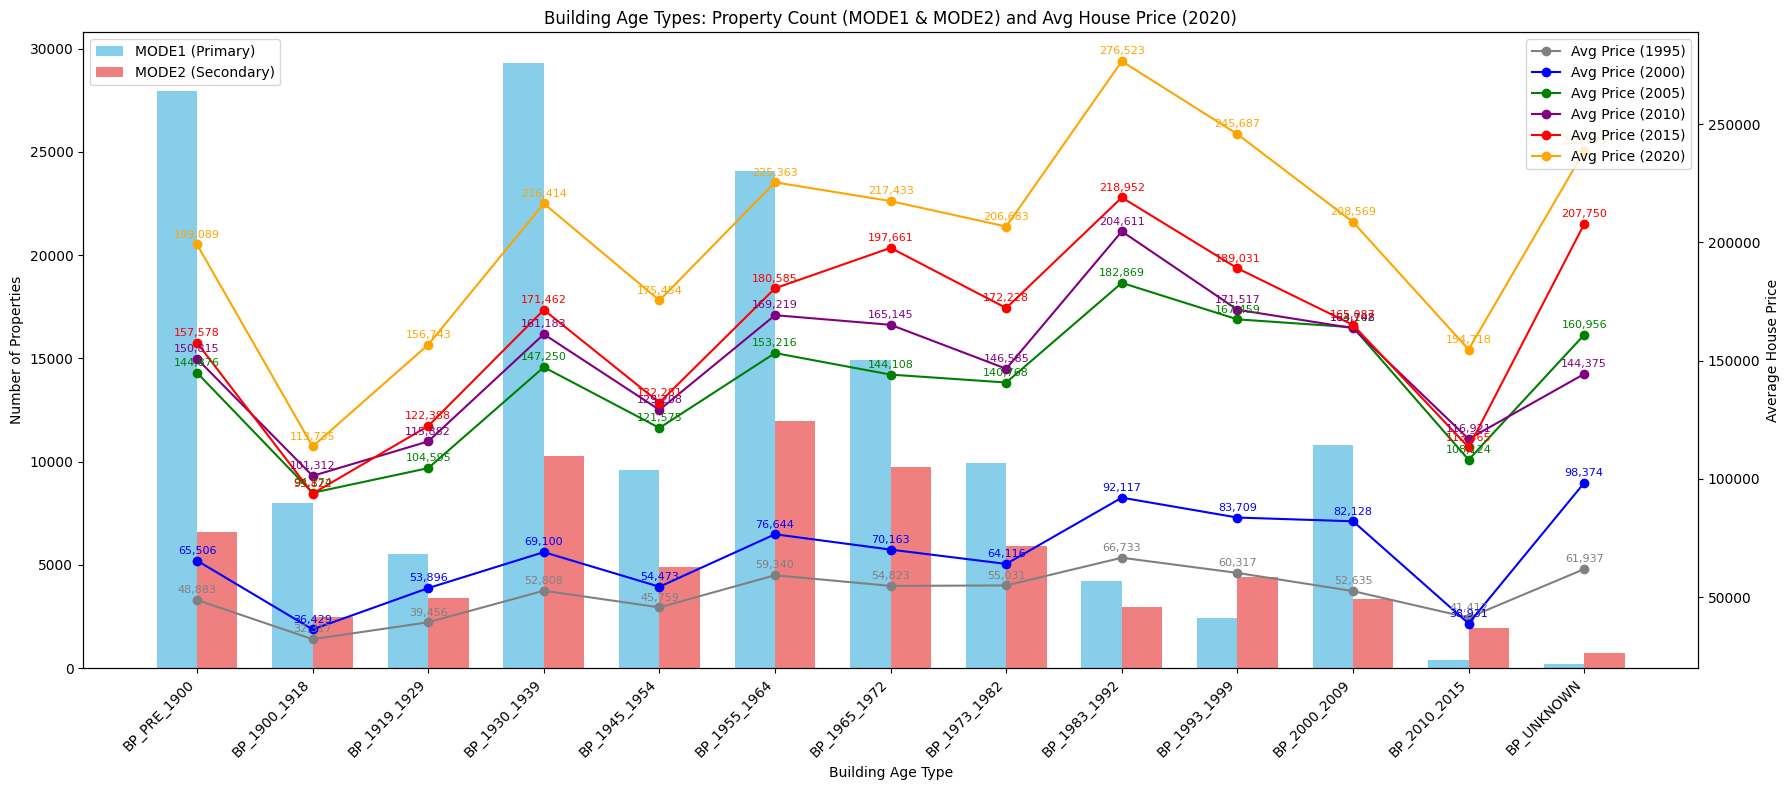

In [189]:
df_final["price_1995"] = df_final[["median_95Q1", "median_95Q2", "median_95Q3", "median_95Q4"]].mean(axis=1)
df_final["price_2000"] = df_final[["median_00Q1", "median_00Q2", "median_00Q3", "median_00Q4"]].mean(axis=1)
df_final["price_2005"] = df_final[["median_05Q1", "median_05Q2", "median_05Q3", "median_05Q4"]].mean(axis=1)
df_final["price_2010"] = df_final[["median_10Q1", "median_10Q2", "median_10Q3", "median_10Q4"]].mean(axis=1)
df_final["price_2015"] = df_final[["median_15Q1", "median_15Q2", "median_15Q3", "median_15Q4"]].mean(axis=1)
df_final["price_2020"] = df_final["hpmd202003"]

# 计算 MODE1 的统计数据，包括 6 年房价
mode1_stats = df_final.groupby('MODE1_TYPE').agg(
    total_properties_mode1=('MODE1_VAL', 'sum'),
    avg_price_1995=('price_1995', 'mean'),
    avg_price_2000=('price_2000', 'mean'),
    avg_price_2005=('price_2005', 'mean'),
    avg_price_2010=('price_2010', 'mean'),
    avg_price_2015=('price_2015', 'mean'),
    avg_price_2020=('price_2020', 'mean')
).reset_index().rename(columns={'MODE1_TYPE': 'Building_Age_Type'})

# 计算 MODE2 的统计数据
mode2_stats = df_final.groupby('MODE2_TYPE').agg(
    total_properties_mode2=('MODE2_VAL', 'sum')
).reset_index().rename(columns={'MODE2_TYPE': 'Building_Age_Type'})
# 显示结果查看是否计算正确
print(mode1_stats.head())
print(mode2_stats.head())

# 合并两个数据表
combined_stats = pd.merge(mode1_stats, mode2_stats, on='Building_Age_Type', how='outer')

# 查看合并后的数据
print(combined_stats.head())
# 定义年龄类型顺序
building_age_order = [
    "BP_PRE_1900", "BP_1900_1918", "BP_1919_1929", "BP_1930_1939", "BP_1945_1954", "BP_1955_1964",
    "BP_1965_1972", "BP_1973_1982", "BP_1983_1992", "BP_1993_1999", "BP_2000_2009", "BP_2010_2015", "BP_UNKNOWN"
]

# 将 Building_Age_Type 设置为有序类别
combined_stats['Building_Age_Type'] = pd.Categorical(
    combined_stats['Building_Age_Type'],
    categories=building_age_order,
    ordered=True
)

# 排序数据
combined_stats = combined_stats.sort_values('Building_Age_Type')

# 查看排序后的数据
print(combined_stats.head())


# X轴的位置
x = np.arange(len(combined_stats))
width = 0.35  # 设置柱宽

fig, ax1 = plt.subplots(figsize=(18, 8))

# 绘制柱状图
bar1 = ax1.bar(x - width/2, combined_stats['total_properties_mode1'], width, label='MODE1 (Primary)', color='skyblue')
bar2 = ax1.bar(x + width/2, combined_stats['total_properties_mode2'], width, label='MODE2 (Secondary)', color='lightcoral')

ax1.set_xlabel('Building Age Type')
ax1.set_ylabel('Number of Properties')
ax1.set_xticks(x)
ax1.set_xticklabels(combined_stats['Building_Age_Type'], rotation=45, ha='right')
ax1.legend(loc='upper left')

# 创建第二个 y 轴，绘制六个年份的房价曲线
ax2 = ax1.twinx()
ax2.set_ylabel('Average House Price', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# 定义颜色字典和年份列表
year_colors = {
    '1995': 'gray',
    '2000': 'blue',
    '2005': 'green',
    '2010': 'purple',
    '2015': 'red',
    '2020': 'orange'
}
years = ['1995', '2000', '2005', '2010', '2015', '2020']

# 绘制每一条曲线并添加数值标签
for year in years:
    price_col = f'avg_price_{year}'
    color = year_colors[year]
    ax2.plot(x, combined_stats[price_col], marker='o', label=f'Avg Price ({year})', color=color)
    # 添加数值标签
    for i, price in enumerate(combined_stats[price_col]):
        ax2.text(x[i], price + 2000, f'{int(price):,}', ha='center', va='bottom', fontsize=8, color=color)

# 添加图例（放在右上角或其他合适位置）
ax2.legend(loc='upper right')



# 标题
plt.title('Building Age Types: Property Count (MODE1 & MODE2) and Avg House Price (2020)')
fig.tight_layout()
plt.show()


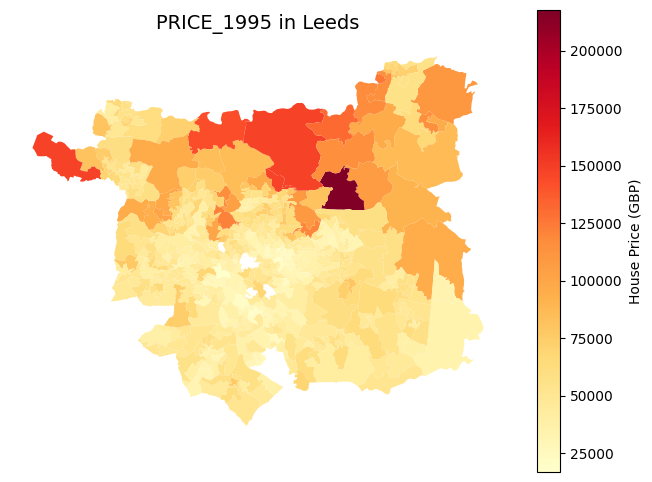

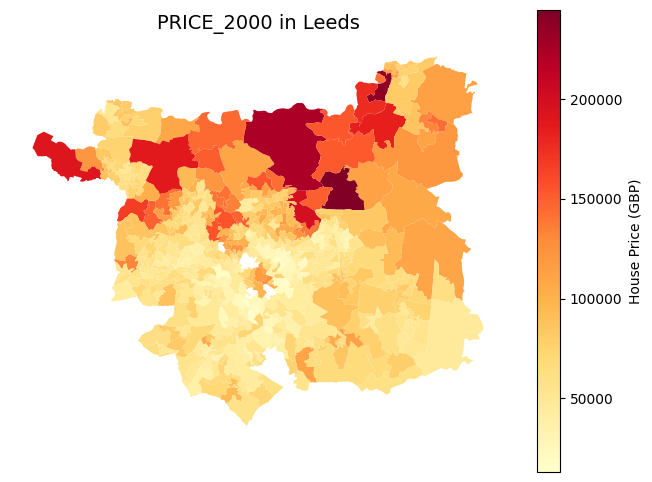

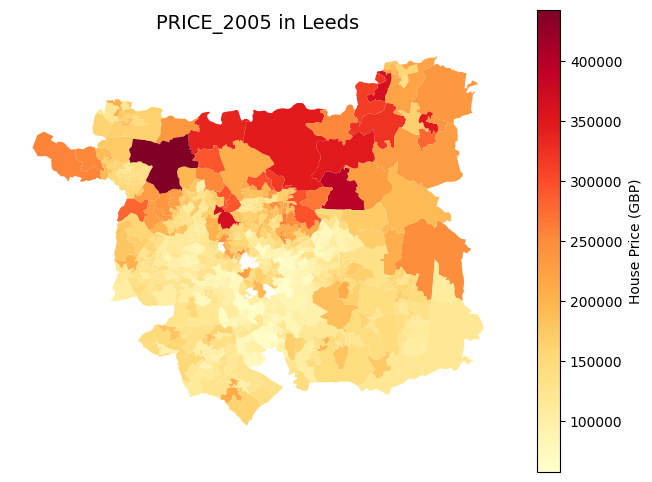

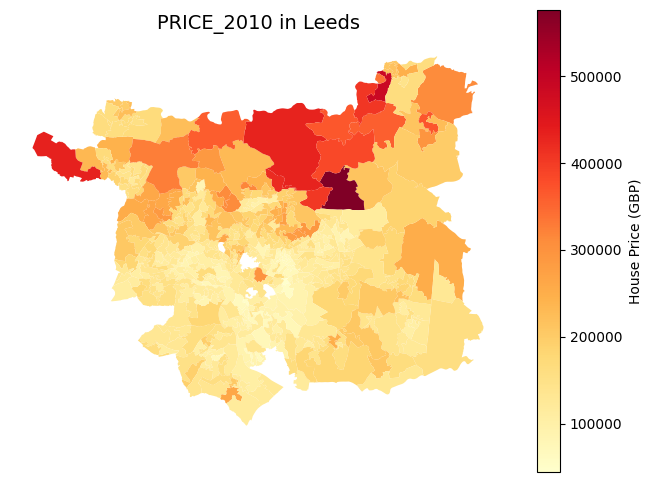

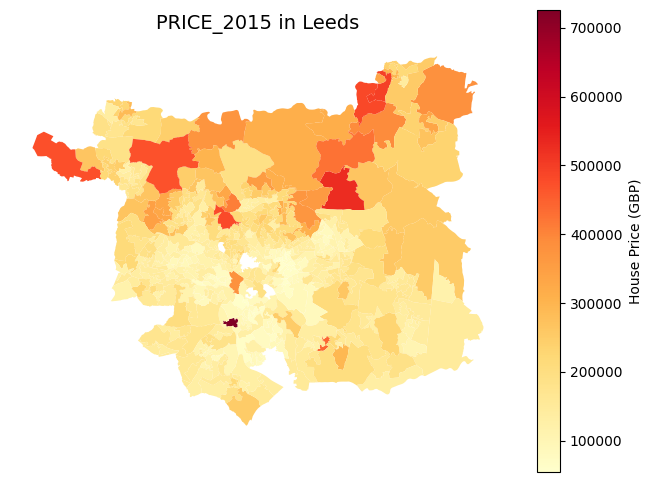

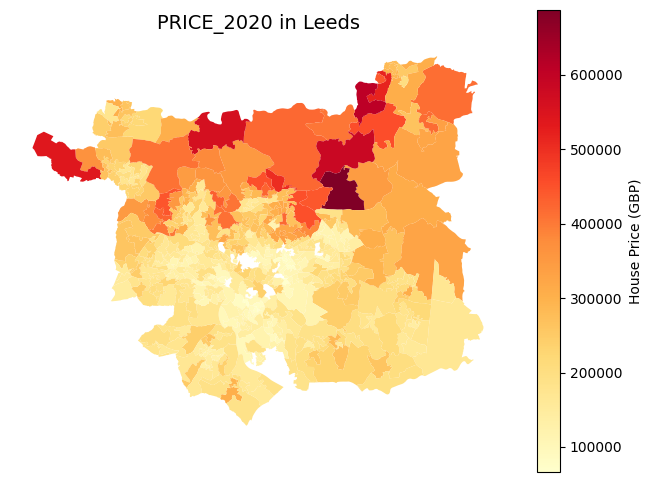

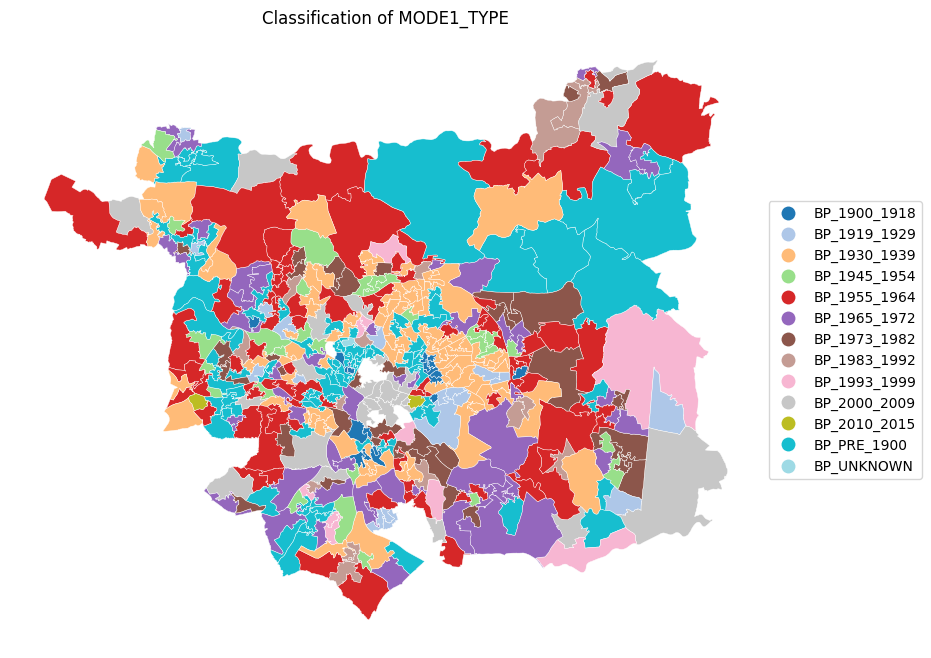

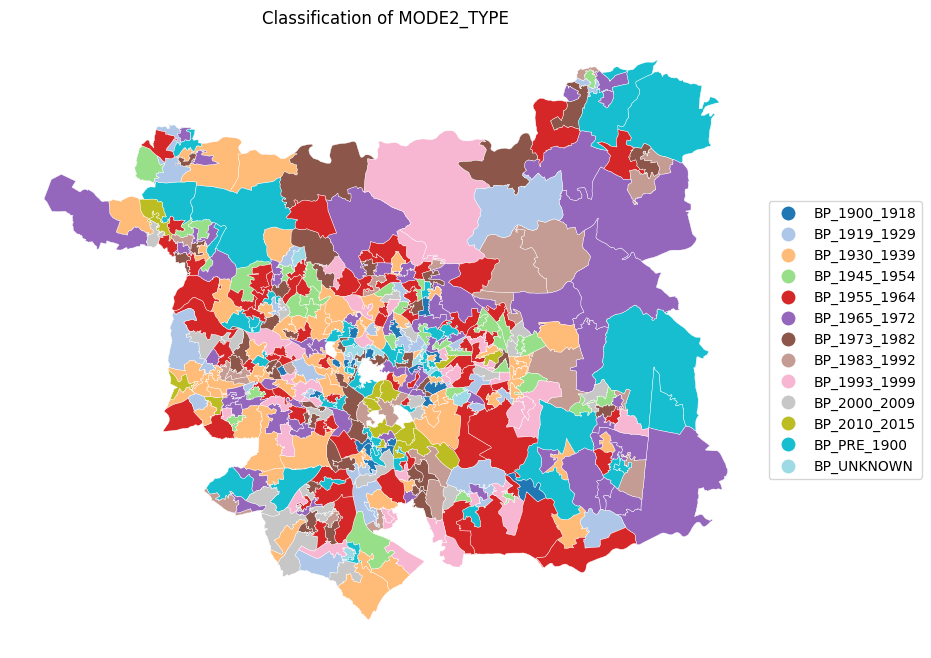

In [190]:
df_final = gpd.GeoDataFrame(df_final, geometry='geometry')

#1. 房价字段列表
price_cols = ['price_1995', 'price_2000', 'price_2005', 'price_2010', 'price_2015', 'price_2020']

# 批量绘图
for col in price_cols:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    df_final.plot(
        column=col,
        cmap='YlOrRd',
        linewidth=0.2,
        legend=True,
        ax=ax,
        legend_kwds={'label': 'House Price (GBP)', 'orientation': 'vertical'}
    )

    ax.set_title(f'{col.upper()} in Leeds', fontsize=14)
    ax.axis('off')
    plt.savefig(f'{col}_leeds_map.jpg', bbox_inches='tight')
    #plt.close()


# 2.绘制分类地图
f, ax = plt.subplots(1, figsize=(16, 8))

df_final.plot(
    column='MODE1_TYPE',  # 选择分类变量
    legend=True,          # 显示图例
    cmap='tab20',          # 分类颜色方案，可以尝试 'Set3' 或其他颜色方案
    edgecolor='white',    # 边界颜色
    linewidth=0.3,        # 边界线宽
    categorical=True,     # 重要：启用分类数据
    ax=ax,                # 设置坐标轴
    legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}  # 设置图例位置
)

# 设置标题
ax.set_title('Classification of MODE1_TYPE')

# 隐藏坐标轴
ax.set_axis_off()

# 显示地图
plt.show()

f, ax = plt.subplots(1, figsize=(16, 8))
# 3.绘制分类地图
df_final.plot(
    column='MODE2_TYPE',  # 选择分类变量
    legend=True,          # 显示图例
    cmap='tab20',          # 分类颜色方案，可以尝试 'Set3' 或其他颜色方案
    edgecolor='white',    # 边界颜色
    linewidth=0.3,        # 边界线宽
    categorical=True,     # 重要：启用分类数据
    ax=ax,                # 设置坐标轴
    legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}  # 设置图例位置
)

# 设置标题
ax.set_title('Classification of MODE2_TYPE')

# 隐藏坐标轴
ax.set_axis_off()

# 显示地图
plt.show()



     MODE1_TYPE House_Type
0  BP_1965_1972  Old House
1   BP_PRE_1900  Old House
2  BP_2000_2009  New House
3  BP_1945_1954  Old House
4  BP_1955_1964  Old House


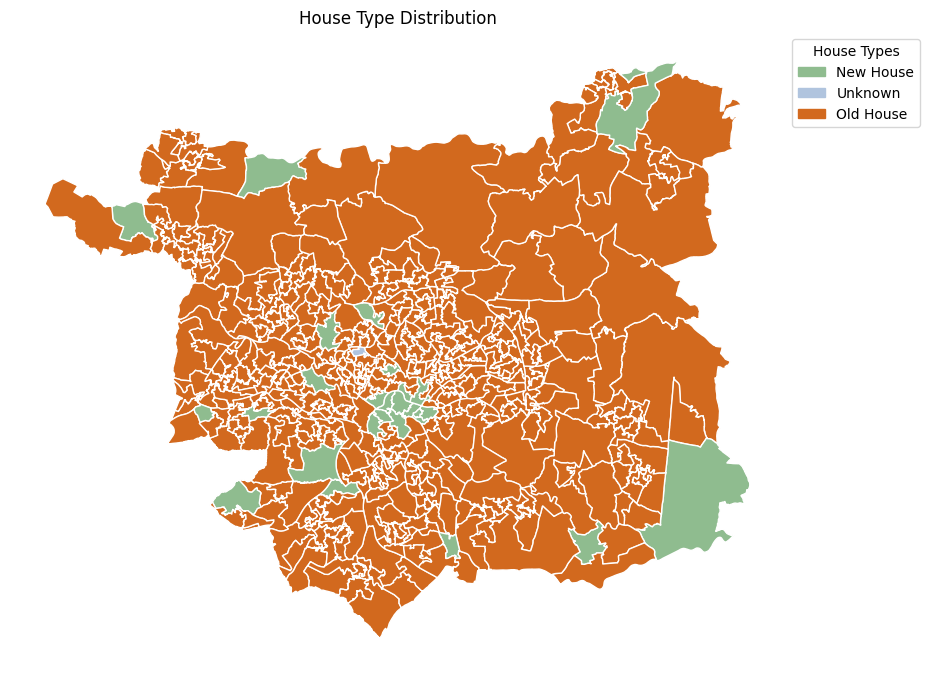

In [181]:


# 创建新的分类列 'House_Type'，默认值为 'Old House'
df_final['House_Type'] = 'Old House'

# 将 'MODE1_TYPE' 为 'BP_2000_2009' 或 'BP_2010_2015' 的行设为 'New House'
df_final.loc[df_final['MODE1_TYPE'].isin(['BP_2000_2009', 'BP_2010_2015']), 'House_Type'] = 'New House'

# 将 'MODE1_TYPE' 为 'BP_UNKNOWN' 的行设为 'Unknown'
df_final.loc[df_final['MODE1_TYPE'] == 'BP_UNKNOWN', 'House_Type'] = 'Unknown'

# 查看结果，只输出 'MODE1_TYPE' 和 'House_Type' 列
print(df_final[['MODE1_TYPE', 'House_Type']].head())


# 创建颜色映射
color_map = {
   "New House": "#8FBC8F",  # 绿色 - 软绿色
    "Unknown": "#B0C4DE",    # 浅灰蓝色 - 更现代的灰色
    "Old House": "#D2691E"   # 砖红色 - 温暖的红色
}

# 创建一个图
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 绘制地图
df_final.plot(ax=ax, color=df_final['House_Type'].map(color_map), edgecolor='white')

# 创建图例手动添加
handles = [mpatches.Patch(color=color_map['New House'], label='New House'),
           mpatches.Patch(color=color_map['Unknown'], label='Unknown'),
           mpatches.Patch(color=color_map['Old House'], label='Old House')]

# 添加图例，调整位置
ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), title="House Types")

# 设置标题
ax.set_title('House Type Distribution')

# 隐藏坐标轴
ax.set_axis_off()

# 显示地图
plt.show()


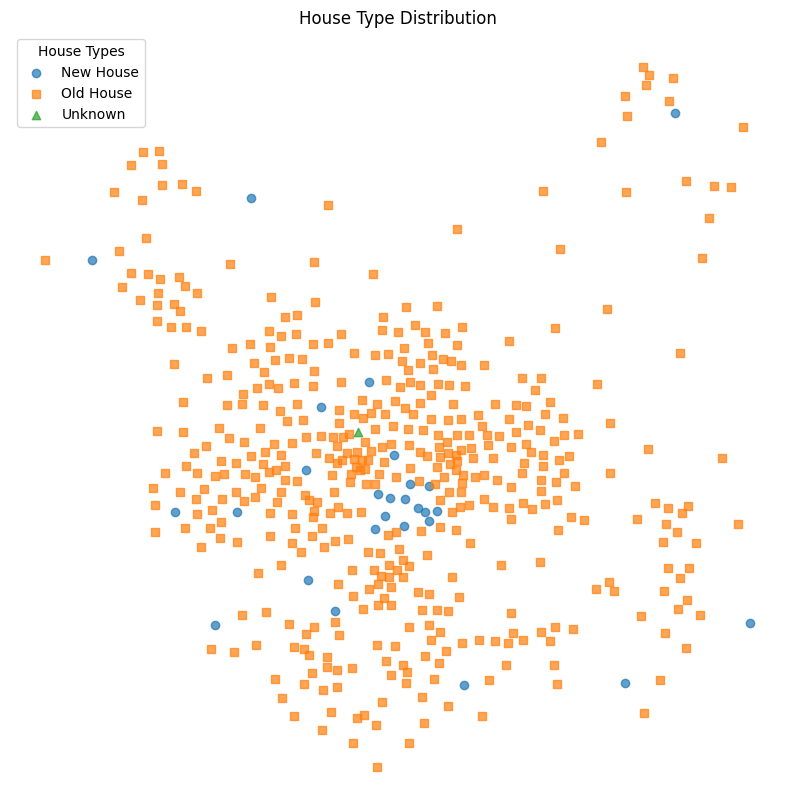

In [186]:

import matplotlib.patches as mpatches
# 创建符号映射
symbol_map = {
    "New House": "o",  # 新房 - 圆形
    "Unknown": "^",    # 未知 - 三角形
    "Old House": "s"   # 老房 - 方形
}
# 假设 subset 是你的 GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))

# 如果你的数据是多边形，可以取其质心（center point）
for House_Type, marker in zip(['New House', 'Old House', 'Unknown'], ['o', 's', '^']):
    subset = df_final[df_final['House_Type'] == House_Type]  # 假设你已经根据房屋类型过滤了数据
    ax.scatter(subset.geometry.centroid.x, subset.geometry.centroid.y, marker=marker, label=House_Type, alpha=0.7)

# 设置标题
ax.set_title('House Type Distribution')

# 添加图例
ax.legend(title="House Types")
# 隐藏坐标轴
ax.set_axis_off()

# 显示地图
plt.show()

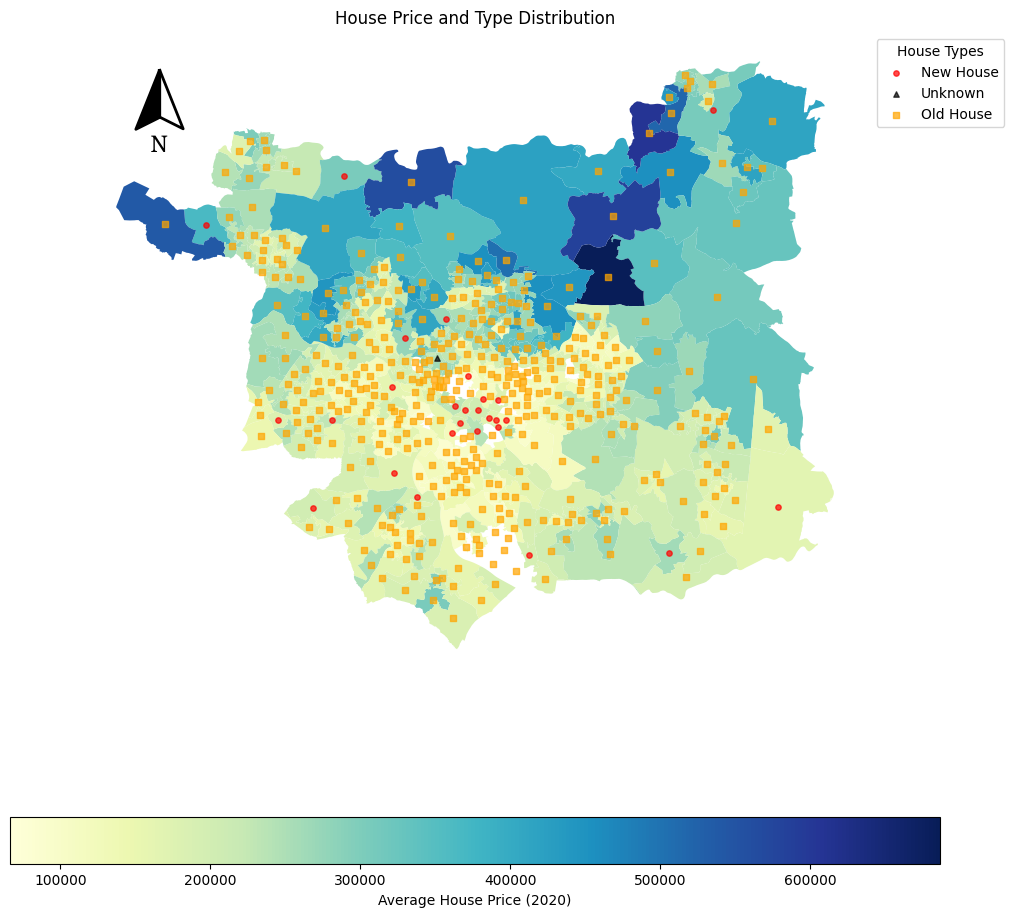

In [210]:
# 创建符号和颜色映射
symbol_map = {
    "New House": "o",  # 新房 - 圆形
    "Unknown": "^",    # 未知 - 三角形
    "Old House": "s"   # 老房 - 方形
}

color_map = {
    "New House": 'red',  # 绿色 - 软绿色
    "Unknown": "black",    # 浅灰蓝色 - 更现代的灰色
    "Old House": "orange"   # 砖红色 - 温暖的红色
}

# 创建一个地图并设置其大小
fig, ax = plt.subplots(figsize=(12, 12))

# 绘制房价地图 (假设房价数据在 'avg_price_2020' 列中)
df_final.plot(column='price_2020', ax=ax, cmap='YlGnBu', legend=True,
              legend_kwds={
                  'label': "Average House Price (2020)",  # 图例标题
                  'orientation': 'horizontal',  # 图例方向，垂直排列
              })


# 如果你的数据是多边形，可以取其质心（center point）
for House_Type, marker in symbol_map.items():
    subset = df_final[df_final['House_Type'] == House_Type]  # 假设你已经根据房屋类型过滤了数据
    ax.scatter(subset.geometry.centroid.x, subset.geometry.centroid.y,
               marker=marker, label=House_Type, alpha=0.7, color=color_map[House_Type], s=15)
# Add a north arrow to the map, adjust its position and scale (for documentation, see: https://github.com/pmdscully/geo_northarrow)
add_north_arrow(ax=ax, scale=0.75, xlim_pos=0.1, ylim_pos=0.85, color='#000', text_scaler=2, text_yT=-1.25)

# 设置标题
ax.set_title('House Price and Type Distribution')

# 添加图例
ax.legend(title="House Types", bbox_to_anchor=(1, 1), loc="upper left")

# 隐藏坐标轴
ax.set_axis_off()

# 显示地图
plt.show()

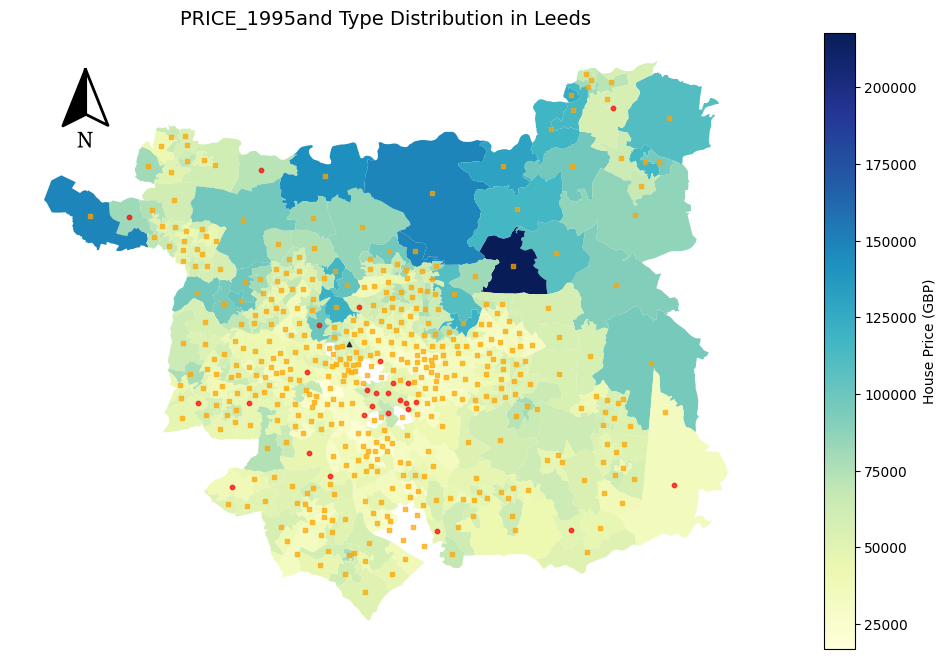

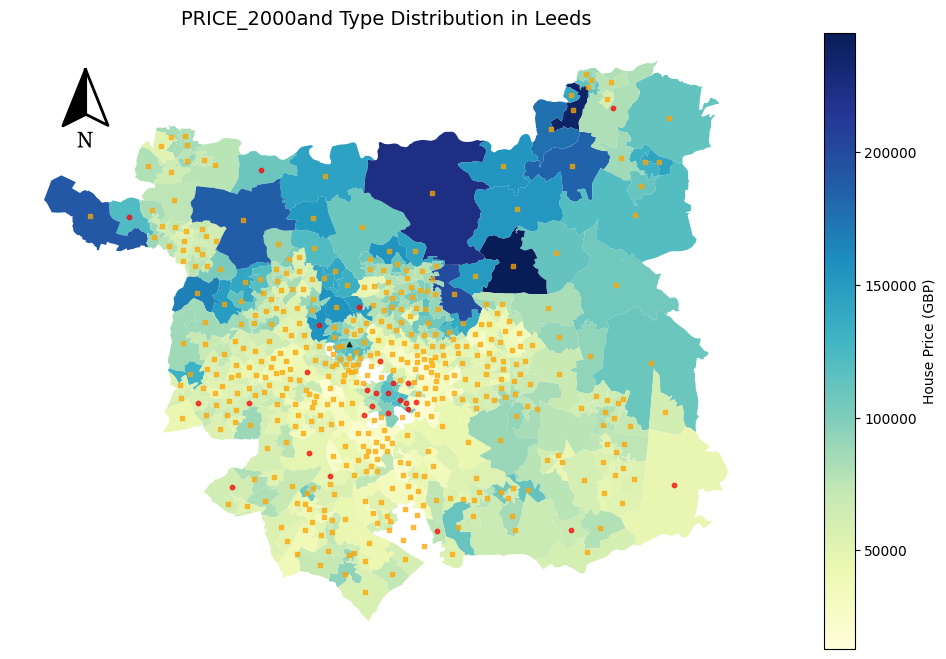

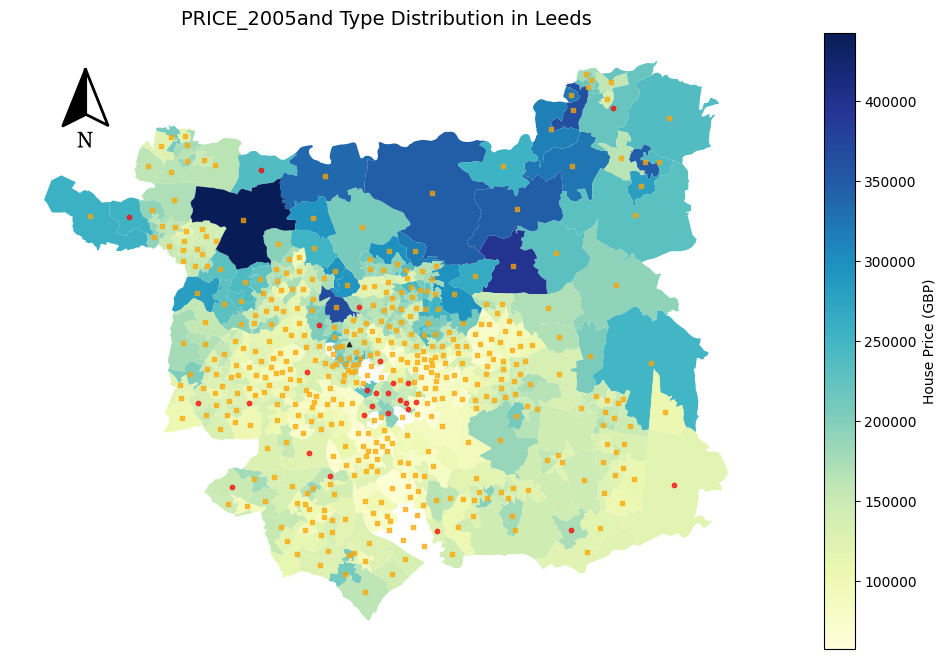

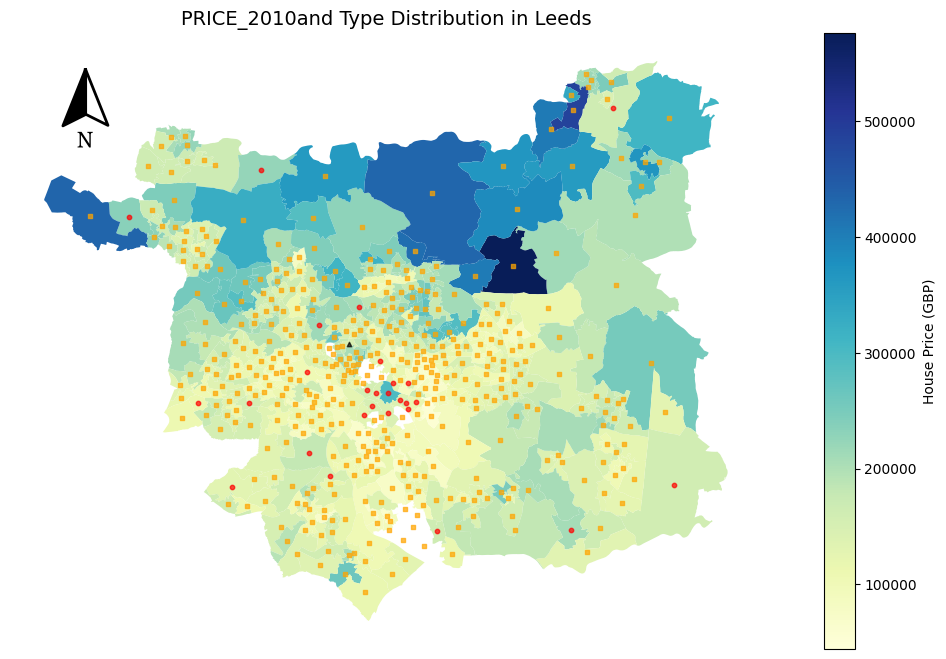

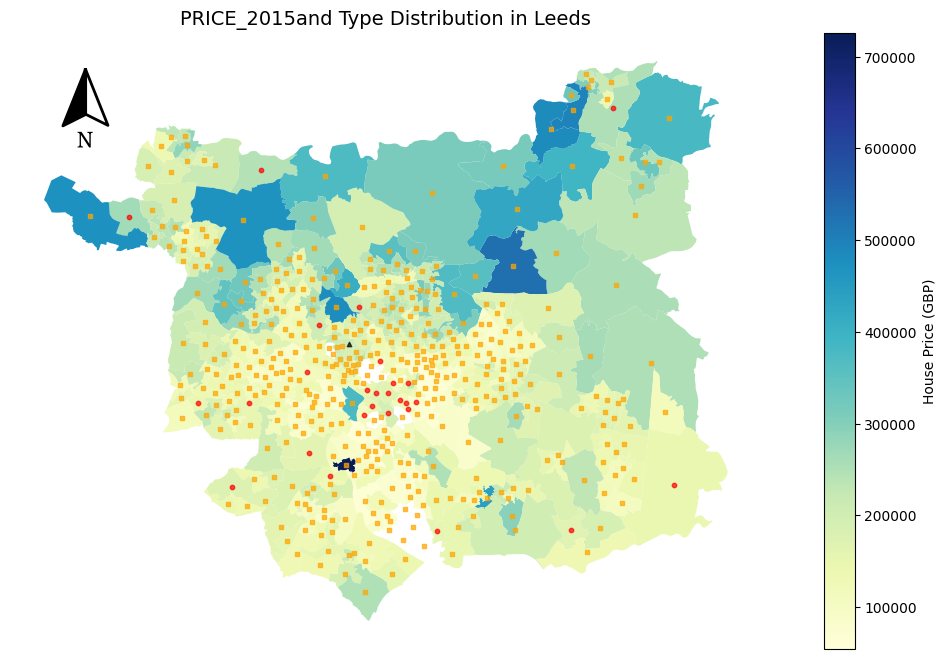

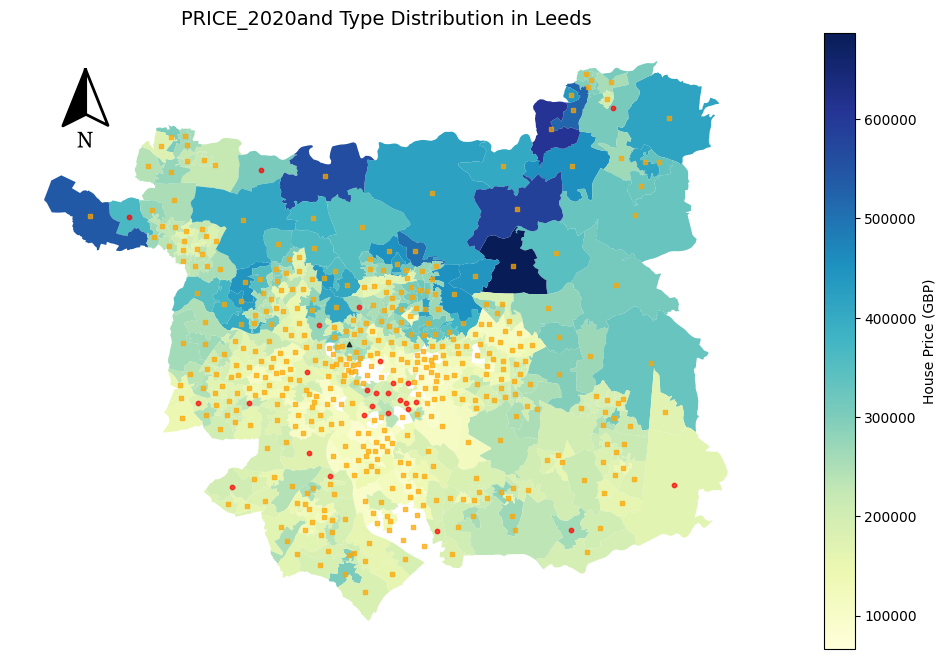

In [219]:
# 1. 房价字段列表
price_cols = ['price_1995', 'price_2000', 'price_2005', 'price_2010', 'price_2015', 'price_2020']

# 批量绘图
for col in price_cols:
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))

    # 绘制房价地图
    df_final.plot(
        column=col,
        cmap='YlGnBu',
        linewidth=0.2,
        legend=True,
        ax=ax,
        legend_kwds={'label': 'House Price (GBP)', 'orientation': 'vertical'}
    )

    # 创建符号映射
    symbol_map = {
        "New House": "o",  # 新房 - 圆形
        "Unknown": "^",    # 未知 - 三角形
        "Old House": "s"   # 老房 - 方形
    }

    color_map = {
        "New House": 'red',  # 绿色
        "Unknown": "black",     # 灰色
        "Old House": "orange"     # 红色
    }

    # 在房价地图上叠加房屋类型符号
    for House_Type, marker in symbol_map.items():
        subset = df_final[df_final['House_Type'] == House_Type]  # 假设你已经根据房屋类型过滤了数据
        ax.scatter(subset.geometry.centroid.x, subset.geometry.centroid.y,
                   marker=marker, label=House_Type, alpha=0.7, color=color_map[House_Type], s=10)

    # 设置标题
    ax.set_title(f'{col.upper()}and Type Distribution in Leeds', fontsize=14)
    # Add a north arrow to the map, adjust its position and scale (for documentation, see: https://github.com/pmdscully/geo_northarrow)
    add_north_arrow(ax=ax, scale=0.75, xlim_pos=0.1, ylim_pos=0.85, color='#000', text_scaler=2, text_yT=-1.25)
    # 隐藏坐标轴
    ax.axis('off')

    # 保存图像
    plt.savefig(f'{col}_leeds_map_with_symbols.jpg', bbox_inches='tight')
    #plt.close()

Data Visualisation
- Don't forget to present your final two data visualisation (one spatial and one non-spatial) and the justifications about the decisions you made whilst preparing and visualising the data.

     FID   LSOA21CD    LSOA21NM   BNG_E   BNG_N     LONG       LAT  \
0  10720  E01011264  Leeds 011A  420937  441836 -1.68306  53.87232   
1  10721  E01011265  Leeds 009A  418988  441951 -1.71269  53.87343   
2  10722  E01011266  Leeds 008A  417489  442615 -1.73545  53.87945   
3  10723  E01011267  Leeds 009B  419641  442025 -1.70276  53.87407   
4  10724  E01011268  Leeds 010A  420224  441935 -1.69390  53.87324   

                               GlobalID  \
0  14a73329-fc8f-464c-a4fa-1963baa35500   
1  eda471dd-f408-4dab-917e-c5e188310b35   
2  286c32c5-ef49-4ecc-a45e-57630c165c62   
3  318cfaa3-9f08-4d61-a30e-82e903f3a7ba   
4  049e79f0-cd9e-47dc-848b-b6d6fa6825ac   

                                            geometry  AREA_CODE  ...  \
0  POLYGON ((421248.688 442315.812, 421284.072 44...  E01011264  ...   
1  POLYGON ((418635 442559, 418637.555 442552.869...  E01011265  ...   
2  POLYGON ((417783.688 443382.312, 417788.688 44...  E01011266  ...   
3  POLYGON ((419607.843 442388.5

## References
<p><a href="add_url_here">[1]</a>Footnote citation goes here</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[2]</a>GEOG5990M course materials</p>
<p><a href="add_url_here">[3]</a>Citation 3</p>